# Housing Price Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.shape

(20640, 10)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# removing duplicate values if present
dup = df.duplicated()
df = df[~dup]
df.shape

(20640, 10)

In [9]:
# filling the null value present in total bedroom by median

df.loc[df['total_bedrooms'].isna(), 'total_bedrooms'] = df['total_bedrooms'].median()

In [10]:
# checking minimum and maximum value of the columns in case of invalid value presents
for i in df:
    if i == 'ocean_proximity': #skip
        continue
    else:
        print(f"{i} has min value of {df[i].min()} and maximum value is {df[i].max()}")

longitude has min value of -124.35 and maximum value is -114.31
latitude has min value of 32.54 and maximum value is 41.95
housing_median_age has min value of 1.0 and maximum value is 52.0
total_rooms has min value of 2.0 and maximum value is 39320.0
total_bedrooms has min value of 1.0 and maximum value is 6445.0
population has min value of 3.0 and maximum value is 35682.0
households has min value of 1.0 and maximum value is 6082.0
median_income has min value of 0.4999 and maximum value is 15.0001
median_house_value has min value of 14999.0 and maximum value is 500001.0


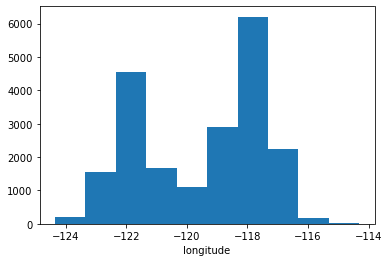

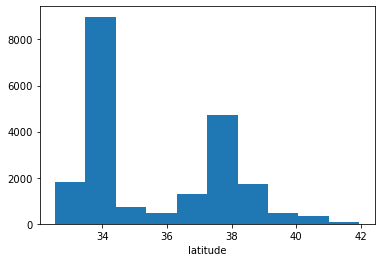

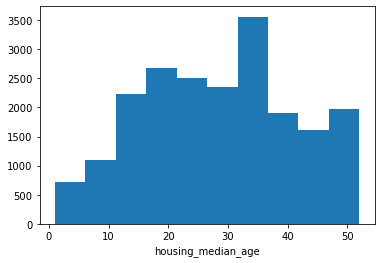

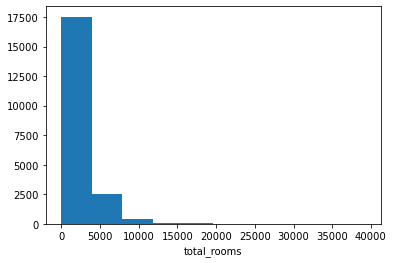

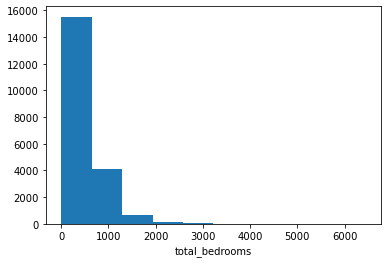

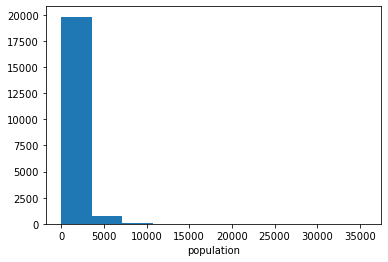

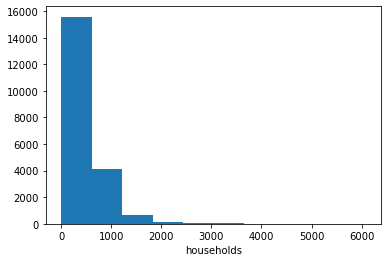

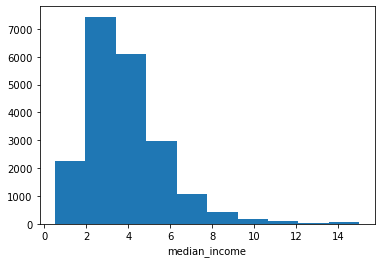

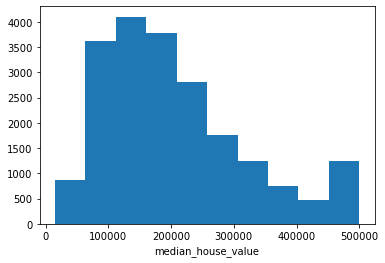

In [11]:
for i in df:
    if i == 'ocean_proximity':  #skip
        continue 
    else:
        plt.hist(df[i]) #histogram
        plt.xlabel(i)
        plt.show()

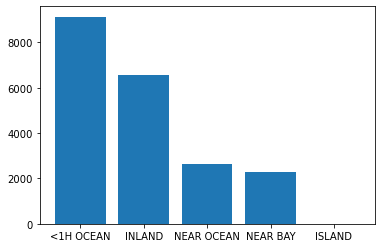

In [12]:
ocean = df['ocean_proximity'].value_counts()
plt.bar(ocean.index, ocean)                         
plt.show()


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

df2 = df.copy(deep=True) #dataset copy
ohe = OneHotEncoder(sparse=False) # sparse matrix convert (python object[0,1])
oc = ohe.fit_transform(df2[['ocean_proximity']]) #fit:- read,transform = 0,1 convert

In [16]:
cols = ohe.categories_

In [17]:
oc_df = pd.DataFrame(oc, columns=cols)
oc_df.shape

(20640, 5)

In [18]:
df2 = df2.drop('ocean_proximity',axis=1)
df2 = pd.concat([df2, oc_df], axis=1)
X,y = df2.drop('median_house_value', axis=1), df2['median_house_value']  #x= drop median house value,y=median ..... 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test) #r2 score

0.6396295727172021

In [19]:
rf = RandomForestRegressor() #Regression
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8175886980584328

In [25]:
# Lets check how the model is working - Lets predict as per your data

print("please enter the following values to predict price")
print("---------------------------------------------------")
long = float(input("longitude: "))
lat = float(input("latitude: "))
med_age = float(input("median age of house: "))
tot_rooms = float(input("total rooms: "))
tot_bed = float(input("total bedrooms: "))
population = int(input("population: "))
households = int(input("households: "))
med_incom = float(input("median_income: "))
ocean_prox = input("ocean proximity enter from <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND: ")

please enter the following values to predict price
---------------------------------------------------
longitude: 122
latitude: 56
median age of house: 5
total rooms: 6
total bedrooms: 3
population: 5
households: 5
median_income: 50000
ocean proximity enter from <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND: NEAR OCEAN


In [26]:
data = [[long,lat,med_age,tot_rooms,tot_bed,population,households,med_incom] + ohe.transform([[ocean_prox]]).tolist()[0]]
data

[[122.0, 56.0, 5.0, 6.0, 3.0, 5, 5, 50000.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [27]:
# predicting by linear regression

print(f"approxiate value of the house by linear regression is {int(reg.predict(data))}")

approxiate value of the house by linear regression is 1937577414


In [28]:
# predicting by Random Forest

print(f"approxiate value of the house by Random Forest is {int(rf.predict(data))}")

approxiate value of the house by linear regression is 392204


In [ ]:
# we can use random forest as it's r2 score is better. So your house with above data will be of 428225.